# Inferential Statistics Ib - Frequentism

## Learning objectives

Welcome to the second Frequentist inference mini-project! Over the course of working on this mini-project and the previous frequentist mini-project, you'll learn the fundamental concepts associated with frequentist inference. The following list includes the topics you will become familiar with as you work through these two mini-projects:
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate confidence intervals and p-values
* how those confidence intervals and p-values allow you to perform hypothesis (or A/B) tests

## Prerequisites

* what a random variable is
* what a probability density function (pdf) is
* what the cumulative density function is
* a high-level sense of what the Normal distribution

If these concepts are new to you, please take a few moments to Google these topics in order to get a sense of what they are and how you might use them.

These two notebooks were designed to bridge the gap between having a basic understanding of probability and random variables and being able to apply these concepts in Python. This second frequentist inference mini-project focuses on a real-world application of this type of inference to give you further practice using these concepts. 

In the previous notebook, we used only data from a known normal distribution. You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.

## Hospital medical charges

Imagine that a hospital has hired you as their data analyst. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. This mini-project, as well as the bootstrap and Bayesian inference mini-projects also found in this unit are designed to illustrate how each of the inferential statistics methods have their uses for different use cases. In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?
Answering that last question with a frequentist approach makes some assumptions, or requires some knowledge, about the two groups. In the next mini-project, you'll use bootstrapping to test that assumption. And in the final mini-project of the unit, you're going to create a model for simulating _individual_ charges (not a sampling distribution) that the hospital can use to model a range of scenarios.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). For the purposes of this exercise, assume the observations are the result of random sampling from our one hospital. Recall in the previous assignment, we introduced the Central Limit Theorem (CLT), and how it tells us that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data. Remember, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import t
from numpy.random import seed
medical = pd.read_csv('data/insurance2.csv')

In [2]:
medical.shape

(1338, 8)

In [3]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

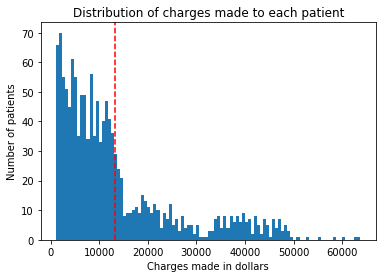

In [4]:
_ = plt.hist(medical['charges'], bins=100, histtype='stepfilled')
_ = plt.xlabel('Charges made in dollars')
_ = plt.ylabel('Number of patients')
_ = plt.axvline(medical.charges.mean(), color='r', linestyle='--')
_ = plt.title('Distribution of charges made to each patient')

In [5]:
print("The mean is {} and the std is {}".format(np.mean(medical.charges), np.std(medical.charges)))
print("There is a bigger number of patients who are paying 13270 or less than patients who are paying 13270 or more.")
df = pd.DataFrame(medical)
print(df.loc[df['charges'] >= 13270, ['charges']].count())
print(df.loc[df['charges'] < 13270, ['charges']].count())
print()

The mean is 13270.422265141257 and the std is 12105.484975561605
There is a bigger number of patients who are paying 13270 or less than patients who are paying 13270 or more.
charges    420
dtype: int64
charges    918
dtype: int64



In [6]:
# We can make a distribution with these amounts
med_charges = norm.rvs(loc=13270, scale=12105, size=1338)
print(med_charges)

[ 3033.60988239  5352.38365088 -4416.69532784 ... 30094.53953156
 16525.39735922 30881.57990236]


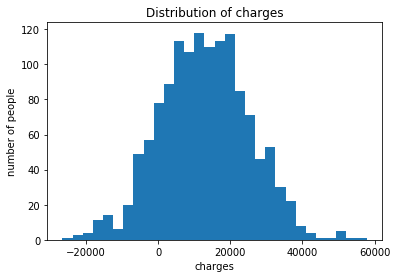

In [7]:
_ = plt.hist(med_charges, bins=30)
_ = plt.xlabel('charges')
_ = plt.ylabel('number of people')
_ = plt.title('Distribution of charges')

__Q:__ The administrator is concerned that the actual average charge has fallen below 12000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__ The assumption is that the data is based on a sample of charges, which means that from these statistics, assumptions need to be made for the population. I would use a sampling distribution with calculation of the CL Theorem to get the population mean to make proper conclusions if the average charge has fallen below 12000. The CLT allows us to make proper conclusions regarding the mean and std/sterr, to ultimately put the average charges into perspective.

__Q:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A one-sided or two-sided interval? Calculate the critical value and the relevant 95% confidence interval for the mean and comment on whether the administrator should be concerned?

__A:__ 95% CI and CV: It is a one-sided interval since we are concerned about an amount which should not be below 12000. The critical value corresponding with a one-tailed interval is 0.05 (and not 0.025 in case of a two-tailed interval). There is a negative z-score since we are only interested in the numbers below the 12000 supposed average charge. Mean for the sample is 13270 and std is 12105.
For the CV for a relevant 95% CI, we have to find the z-score first of this CL. The result is a critical value bigger than 12000, hence the administartor doesn't need to worry.

In [8]:
# Calculate t value using t.ppf
area_of_alpha = 0.05
sample_mean = np.mean(medical.charges)
sample_std = np.std(medical.charges)
t_value = t.ppf(area_of_alpha, len(medical.charges))
print(sample_std,t_value)

# Calculate the margin of error for the calculated t value

std_error = sample_std / np.sqrt(len(medical.charges))
marg_error_t = t_value*std_error
print(std_error, marg_error_t)

# Calculate the lower confidence interval for the one-tailed test
confidence_int_t =  sample_mean + marg_error_t
print("Administration doesn't need to be worried, CI is bigger than 12000 in 95% of the time: {}".format(confidence_int_t))

#Therefore, there is a 95% chance that the population mean is greater than 12725.69. 
#The probability of the true mean being below $12000 is very small. 


12105.484975561605 -1.6459932615808077
330.943713906084 -544.7311230519409
Administration doesn't need to be worried, CI is bigger than 12000 in 95% of the time: 12725.691142089316


The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means where the pooled standard deviation of the two groups is given by
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t* test statistic is then given by

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

What assumption about the variances of the two groups are we making here?

__A:__ Null hypothesis H0: people with insurance are charged differently H1: people with NO insurance are charged differently

The t test tells you how significant the differences between groups are; In other words it lets you know if those differences (measured in means/averages) could have happened by chance.

Assumptions: The variances are equal

In [19]:
#H0 and H1
h0 = medical.loc[medical['insuranceclaim'] == 1, 'charges']
h1 = medical.loc[medical['insuranceclaim'] == 0, 'charges']
n1 = sum(medical['insuranceclaim'] == 1)
n0 = sum(medical['insuranceclaim'] == 0)
x1 = (np.mean(h0))
x0 = (np.mean(h1))
s1 = (np.std(h0,ddof = 1))
s0 = (np.std(h1, ddof =1))

__Q:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

In [10]:
# Pooled Standard Devation and critical t value
std_p = np.sqrt((((n0-1)*s0**2) + ((n1-1)*s1**2))/(n0 +n1 -2))
print('Pooled std is {}'.format(std_p))
CV = (x0 - x1) /((std_p) * np.sqrt((1/n0) +(1/n1)))
print('Critical t value is {}'.format(CV))

Pooled std is 11520.034268775256
Critical t value is -11.89329903087671


In [23]:
# Calculate the p value
pvalue = 2*t.cdf(CV, n0 + n1 - 2)
pvalue
print(pvalue)

4.461230231620972e-31


__A:__ Assumption of Independence: you need two independent, categorical groups that represent your independent variable. In the above example of test scores “males” or “females” would be your independent variable.
Assumption of normality: the dependent variable should be approximately normally distributed. The dependent variable should also be measured on a continuous scale. In the above example on average test scores, the “test score” would be the dependent variable.
Assumption of Homogeneity of Variance: The variances of the dependent variable should be equal.

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do pass your data to it.

__Q:__ In the above calculations, we assumed the sample variances were equal. We may well suspect they are not (we'll explore this in another assignment). The calculation becomes a little more complicated to do by hand in this case, but we now know of a helpful function. Check the documentation for the function to tell it not to assume equal variances and perform the test again.

In [17]:
#By function import module from ttest_ind
from scipy.stats import ttest_ind
by_function = ttest_ind(h0,h1)
print(by_function)

Ttest_indResult(statistic=11.893299030876712, pvalue=4.461230231620717e-31)


__Q:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test